In [26]:
import rasterio as rio
from rasterio.plot import plotting_extent
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import os
import seaborn as sns
plt.ion()
plt.rcParams['figure.figsize'] = (8, 8)
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [6]:
consumption = rio.open('november_tests_atlasai_consumption_allyears_2km.tif')

In [7]:
consumption.bounds

BoundingBox(left=3672952.0, bottom=378576.0, right=5340216.0, top=1673000.0)

In [8]:
consumption.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 872,
 'height': 677,
 'count': 4,
 'crs': CRS.from_epsg(3857),
 'transform': Affine(1912.0, 0.0, 3672952.0,
        0.0, -1912.0, 1673000.0)}

In [14]:
consumption.count

4

In [16]:
consumption.dataset_mask()

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

Bands are 4 year averages based on README file provided by Atlas

In [32]:
bands = {1: '2015-2018', 2: '2011-2014', 3: '2007-2010', 4: '2003-2006'}

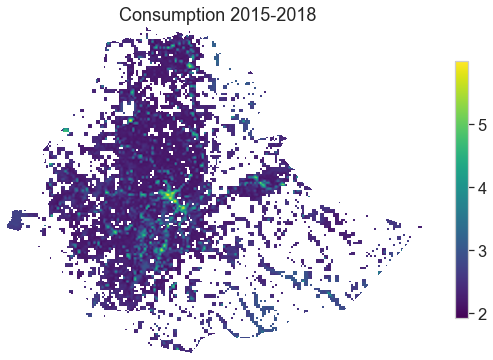

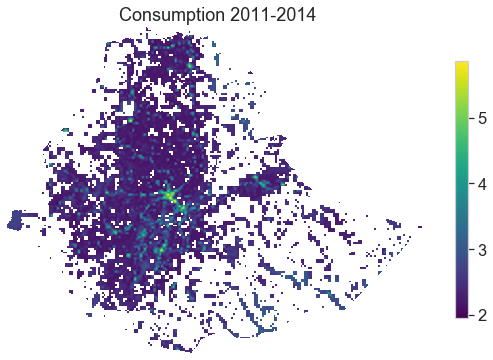

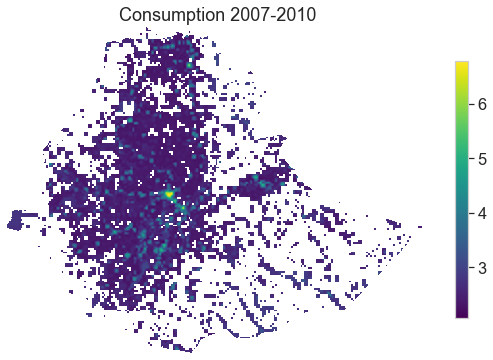

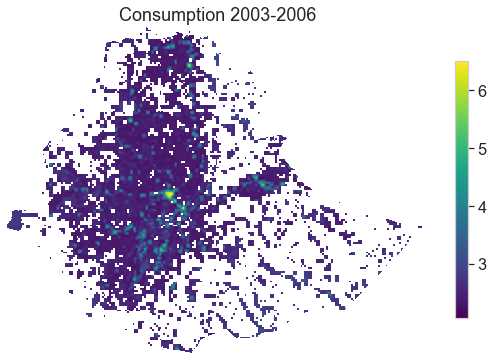

In [35]:
for i in range(1,5):
    cons = consumption.read(i, masked=True) # Read the appropriate band
    fig, ax = plt.subplots(figsize = (10,6))
    chm_plot = ax.imshow(cons, 
                         cmap='viridis')
    fig.colorbar(chm_plot, fraction=.023, ax=ax)
    ax.set_title(f"Consumption {bands[i]}")
    ax.set_axis_off();